# Create a MDAnalysis universe

In [7]:
import numpy as np
import os
import MDAnalysis as mda
import nmrformd as nmrmd

In [8]:
from matplotlib import pyplot as plt

In [9]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
fontsize = 30
font = {'family': 'sans', 'color':  'black', 'weight': 'normal', 'size': fontsize}
myblue = [0/ 255, 150/255, 177/ 255]
lightgray = [0.1, 0.1, 0.1]
darkgray = [0.9, 0.9, 0.9]
myred= [255/ 255, 77/255, 77/ 255]

In [10]:
import sys
sys.path.append('../../examples/shared/')
from tools import figure_improvement, save_figure

In [16]:
numbers_mol =  np.int32(np.logspace(np.log10(25), np.log10(3000), 16))

In [18]:
intra_correlation = []
intra_spectrum = []
inter_correlation = []
inter_spectrum = []
for number_mol in numbers_mol:
    u = None
    data_lammps = "_N"+str(number_mol)+"-lammps/"
    data_gromacs = "_N"+str(number_mol)+"-gromacs/"
    if os.path.exists(data_lammps+"topology.data"):
        u = mda.Universe(data_lammps+"topology.data", data_lammps+"traj.xtc")
        group_i = u.select_atoms("type 2")
    elif os.path.exists(data_gromacs+"run.tpr"):
        u = mda.Universe(data_gromacs+"run.tpr", data_gromacs+"run.xtc")
        group_i = u.select_atoms("type HW")
    if u is not None:
        timestep = np.int32(u.trajectory.dt)
        total_time = np.int32(u.trajectory.totaltime)
        n_molecules = u.atoms.n_residues
        v_box = np.round(np.prod(u.dimensions[:3]) / 1000,1)
        print(f"The number of water molecules is {n_molecules}")
        print(f"The volume of the box is {v_box} nm3")
        # Run NMRforMD
        nmr_intra = nmrmd.NMR(u, group_i, isotropic=True, type_analysis="intra_molecular")
        T1_intra = np.round(nmr_intra.T1,2)
        print(f"The intra-NMR relaxation time is T1 = {T1_intra} s")
        intra_spectrum.append(np.vstack([nmr_intra.f, nmr_intra.R1]))
        intra_correlation.append(np.vstack([nmr_intra.t, nmr_intra.gij[0]]))
        nmr_inter = nmrmd.NMR(u, group_i, isotropic=True, type_analysis="inter_molecular")
        T1_inter = np.round(nmr_inter.T1,2)
        print(f"The interNMR relaxation time is T1 = {T1_inter} s")
        print("--------------------------------")
        intra_spectrum.append(np.vstack([nmr_inter.f, nmr_inter.R1]))
        intra_correlation.append(np.vstack([nmr_inter.t, nmr_inter.gij[0]]))

The number of water molecules is 25
The volume of the box is 0.7 nm3
The NMR relaxation time is T1 = 25.37 s
--------------------------------
The number of water molecules is 34
The volume of the box is 1.0 nm3


/home/simon/.local/lib/python3.10/site-packages/MDAnalysis/coordinates/XDR.py:241: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


The NMR relaxation time is T1 = 5.21 s
--------------------------------
The number of water molecules is 3000
The volume of the box is 91.1 nm3


KeyboardInterrupt: 

The number of water molecules is 49
The volume of the box is 1.5 nm3
The NMR relaxation time is T1 = 3.59 s
--------------------------------
The number of water molecules is 89
The volume of the box is 2.7 nm3
The NMR relaxation time is T1 = 3.13 s
--------------------------------
The number of water molecules is 161
The volume of the box is 4.8 nm3


/home/simon/.local/lib/python3.10/site-packages/MDAnalysis/coordinates/XDR.py:241: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


The NMR relaxation time is T1 = 3.34 s
--------------------------------


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


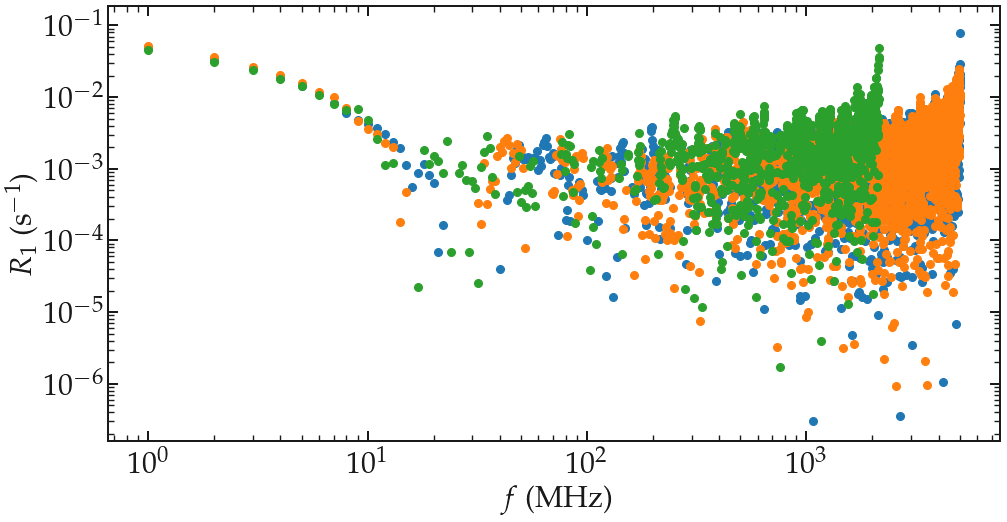

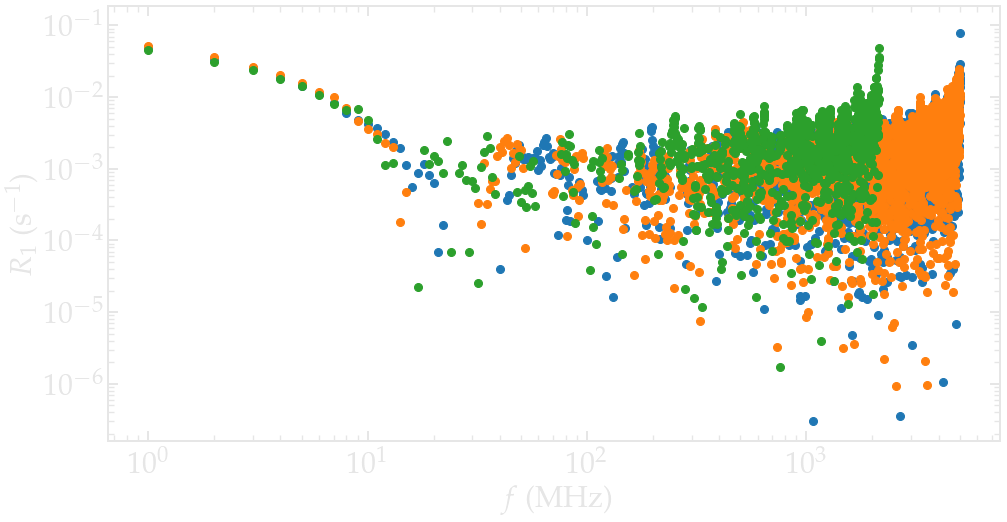

In [24]:
for mode, mygray in zip(['light', 'dark'], [lightgray, darkgray]):
    fig = plt.figure(figsize=(16, 8))
    ax1 = fig.add_subplot(111)
    for result in results:
        ax1.loglog(result[0], result[1], 'o', markersize=8) # , color=myblue)
    figure_improvement(ax1, mygray, font, fontsize,
                       xlabel=r"$f$ (MHz)", ylabel=r'$R_1$ (s$^{-1}$)') #,
                       #xlim=(5e2, 3e5), ylim=(0.001, 10))
    #save_figure(plt, fig, mode, name='T1')

In [ ]:
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(111)

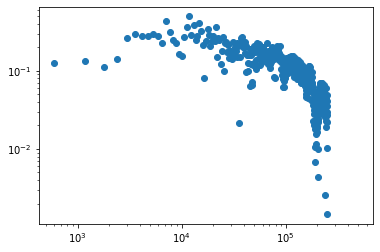

In [24]:
plt.loglog(nmr_result.f, nmr_result.R1, 'o')

# Extract results

In [ ]:
T1 = np.round(nmr_result.T1,2)
print(f"NMR relaxation time T1 = {T1} s")

#### Plot the spectrum

Note: here, one figure is made for the light mode of the documentation, the other one for the dark mode

In [22]:
from matplotlib import pyplot as plt

In [ ]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
fontsize = 30
font = {'family': 'sans', 'color':  'black', 'weight': 'normal', 'size': fontsize}
myblue = [0/ 255, 150/255, 177/ 255]
lightgray = [0.1, 0.1, 0.1]
darkgray = [0.9, 0.9, 0.9]
myred= [255/ 255, 77/255, 77/ 255]

In [ ]:
import sys
sys.path.append('../shared/')
from tools import figure_improvement, save_figure

In [ ]:
f_1 = 260
for mode, mygray in zip(['light', 'dark'], [lightgray, darkgray]):
    fig = plt.figure(figsize=(16, 8))
    ax1 = fig.add_subplot(111)
    ax1.loglog(nmr_result.f[:-f_1], 1/nmr_result.R1[:-f_1], 'o', markersize=8, color=myblue)
    figure_improvement(ax1, mygray, font, fontsize,
                       xlabel=r"$f$ (MHz)", ylabel=r'$T_1$ (s)',
                       xlim=(5e2, 3e5), ylim=(1, 100))
    save_figure(plt, fig, mode, name='T1')

# Plot the correlation function

In [ ]:
for mode, mygray in zip(['light', 'dark'], [lightgray, darkgray]):
    fig = plt.figure(figsize=(16, 8))
    ax1 = fig.add_subplot(111)
    ax1.loglog(nmr_result.t, nmr_result.gij[0]/nmr_result.gij[0][0], 'o', markersize=8, color=myblue)
    figure_improvement(ax1, mygray, font, fontsize,
                       xlabel=r"$t$ (ps)", ylabel=r'$G^{(0)} (t) / G^{(0)} (0)$',
                       xlim=(1, 200), ylim=(0.0001, 1))
    save_figure(plt, fig, mode, name='Gij')

# Intra/Inter motion

In [ ]:
nmr_result_intra = nmrmd.NMR(u, group_i, type_analysis="intra_molecular", number_i=0)
nmr_result_inter = nmrmd.NMR(u, group_i, type_analysis="inter_molecular", number_i=20)

In [ ]:
f_1 = 250
for mode, mygray in zip(['light', 'dark'], [lightgray, darkgray]):
    fig = plt.figure(figsize=(16, 8))
    ax1 = fig.add_subplot(111)
    ax1.loglog(nmr_result.f[:-f_1], nmr_result.R1[:-f_1], 'o', markersize=8, color=myblue, label="Total")
    ax1.loglog(nmr_result_intra.f[:-f_1], nmr_result_intra.R1[:-f_1], 'o', markersize=8, color=myred, label="Intra-molecular")
    ax1.loglog(nmr_result_inter.f[:-f_1], nmr_result_inter.R1[:-f_1], 'o', markersize=8, color=mygray, label="Inter-molecular")
    figure_improvement(ax1, mygray, font, fontsize,
                       xlabel=r"$f$ (MHz)", ylabel=r'$R_1$ (s$^{-1}$)',
                       xlim=(5e2, 3e5), ylim=(0.01, 1))
    save_figure(plt, fig, mode, name='R1-intra-inter')

In [ ]:
for mode, mygray in zip(['light', 'dark'], [lightgray, darkgray]):
    fig = plt.figure(figsize=(16, 8))
    ax1 = fig.add_subplot(111)
    ax1.loglog(nmr_result.t, nmr_result.gij[0]/nmr_result.gij[0][0], 'o', markersize=8, color=myblue, label="Total")
    ax1.loglog(nmr_result_intra.t, nmr_result_intra.gij[0]/nmr_result.gij[0][0], 'o', markersize=8, color=myred, label="Intra-molecular")
    ax1.loglog(nmr_result_inter.t, nmr_result_inter.gij[0]/nmr_result.gij[0][0], 'o', markersize=8, color=mygray, label="Inter-molecular")
    figure_improvement(ax1, mygray, font, fontsize,
                       xlabel=r"$t$ (ps)", ylabel=r'$G^{(0)} (t) / G^{(0)} (0)$',
                       xlim=(1, 100), ylim=(0.0001, 1))
    save_figure(plt, fig, mode, name='Gij-intra-inter')

# Proportionality between $G^{m}$ functions

In [ ]:
nmr_aniso = nmrmd.NMR(u, group_i, number_i=80, isotropic=False)

In [ ]:
for mode, mygray in zip(['light', 'dark'], [lightgray, darkgray]):
    fig = plt.figure(figsize=(16, 8))
    ax1 = fig.add_subplot(111)
    ax1.loglog(nmr_aniso.t, nmr_aniso.gij[0]/nmr_aniso.gij[0][0], 'o', markersize=8, color=myblue, label="$G^{(0)}(t) / G^{(0)}(0)$")
    ax1.loglog(nmr_aniso.t, 6*nmr_aniso.gij[1]/nmr_aniso.gij[0][0], 'o', markersize=8, color=myred, label="$6 G^{(1)}(t) / G^{(0)}(0)$")
    ax1.loglog(nmr_aniso.t, 6*nmr_aniso.gij[2]/nmr_aniso.gij[0][0]/4, 'o', markersize=8, color=mygray, label="$6 G^{(2)}(t) / G^{0()}(0) / 4$")
    figure_improvement(ax1, mygray, font, fontsize,
                       xlabel=r"$t$ (ps)", ylabel=r'$G^{(m)} (t) / G^{(0)} (0)$',
                       xlim=(1, 100), ylim=(0.0001, 1))
    save_figure(plt, fig, mode, name='Gij-aniso')